# ----- Eigenvalues & Eigenvectors -----

## *From Scratch*

In [33]:
import math

In [34]:
# ----- Determinant of 2x2 matrix -----
def determinant_2x2(A):
    return A[0][0]*A[1][1] - A[0][1]*A[1][0]

In [35]:
# ----- Eigenvalues for 2x2 Matrix -----
def eigenvalues_2x2(A):
    # For matrix [[a, b], [c, d]]
    a, b, c, d = A[0][0], A[0][1], A[1][0], A[1][1]

    # Characteristic equation: λ² - (a + d)λ + (ad - bc) = 0
    trace = a + d
    det = determinant_2x2(A)
    discriminant = trace**2 - 4*det

    # Two eigenvalues
    lambda1 = (trace + math.sqrt(discriminant)) / 2
    lambda2 = (trace - math.sqrt(discriminant)) / 2

    return lambda1, lambda2

In [36]:
# ----- Eigenvectors for each eigenvalue -----
def eigenvector_2x2(A, eigenvalue):
    a, b, c, d = A[0][0], A[0][1], A[1][0], A[1][1]

    # Solve (A - λI)v = 0 → pick one equation to find ratio of x and y
    if b != 0:
        x = 1
        y = (eigenvalue - a) / b
    elif c != 0:
        y = 1
        x = (eigenvalue - d) / c
    else:
        # diagonal matrix case
        x, y = 1, 0
    return [x, y]

In [37]:
# ----- Display -----
def display_vector(v):
    print([round(x, 4) for x in v])


# ----- Example -----
A = [[4, 2],
     [1, 3]]

print("Matrix A:")
for row in A:
    print(row)

Matrix A:
[4, 2]
[1, 3]


In [38]:
# Step 1: Eigenvalues
lambda1, lambda2 = eigenvalues_2x2(A)
print("\nEigenvalues:")
print("λ1 =", round(lambda1, 4))
print("λ2 =", round(lambda2, 4))


Eigenvalues:
λ1 = 5.0
λ2 = 2.0


In [39]:
# Step 2: Eigenvectors
print("\nEigenvectors:")
v1 = eigenvector_2x2(A, lambda1)
v2 = eigenvector_2x2(A, lambda2)
print("For λ1:")
display_vector(v1)
print("For λ2:")
display_vector(v2)


Eigenvectors:
For λ1:
[1, 0.5]
For λ2:
[1, -1.0]


## *Using Libraries*

In [41]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
# ----- Define Matrix -----
A = np.array([[4, -2],
              [1, 1]])

In [43]:
# ----- Eigenvalues & Eigenvectors -----
eigenvalues, eigenvectors = np.linalg.eig(A)

In [44]:
# ----- Display -----
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

Eigenvalues: [3. 2.]
Eigenvectors:
 [[0.89442719 0.70710678]
 [0.4472136  0.70710678]]


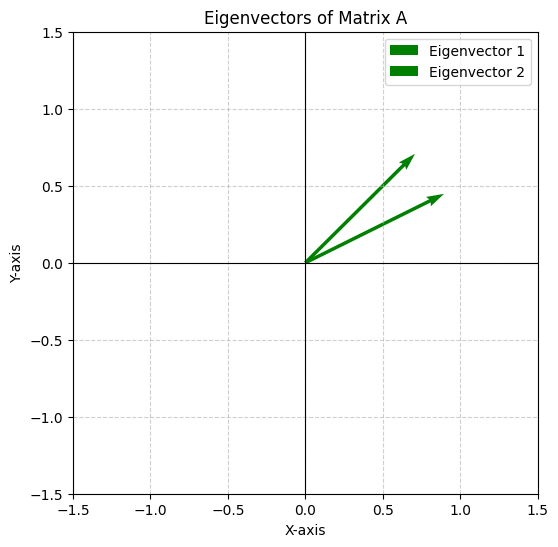

In [45]:
# ----- Plot Settings -----
origin = np.zeros(2)

plt.figure(figsize=(6,6))
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)

# ----- Plot Eigenvectors -----
for i in range(len(eigenvalues)):
    vec = eigenvectors[:, i]
    plt.quiver(*origin, *vec, angles='xy', scale_units='xy', scale=1, color='g', label=f"Eigenvector {i+1}")

# ----- Plot Axes Labels -----
plt.title("Eigenvectors of Matrix A")
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()